In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\nkssd\Desktop\Python\Python.projects\Project-Data\airbnb(compressed_data).csv')

C:\Users\nkssd\AppData\Local\Temp\ipykernel_2636\1643879685.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\nkssd\Desktop\Python\Python.projects\Project-Data\airbnb(compressed_data).csv')


#### Data Cleaning

In [3]:
df.sample(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
9666,6339868,"City retrieve2-comfort, quite, sunny room and ...",26045777990,verified,Jana,Manhattan,Harlem,40.82605,-73.94783,United States,...,$219,31.0,3.0,9/30/2018,0.08,3.0,4.0,61.0,I ask to be respectful to neighbors. To leave...,NaN
45489,26124911,New! Modern Midtown East Sanctury,3525573895,unconfirmed,Manvi,Manhattan,Midtown,40.76066,-73.96639,United States,...,$64,2.0,4.0,6/9/2019,2.73,4.0,1.0,286.0,"No disturbance When talking on the phone, plea...",NaN
55800,31819676,Beautiful and cozy 3 BR in Financial District,26191342156,verified,Celine,Manhattan,Financial District,40.70346,-74.00967,United States,...,$11,30.0,1.0,2/1/2022,0.91,5.0,5.0,288.0,NaN,NaN
15286,9443794,1 Bedroom Outside Columbus Circle,59935613251,verified,Mckenzie,Manhattan,Upper West Side,40.77116,-73.98796,United States,...,$40,2.0,32.0,4/22/2019,0.81,3.0,1.0,415.0,This is a residential property. Quiet is impor...,NaN
84840,47858468,Modern Clean Studio 2 blocks from Central Park,1902703861,verified,Eugene,Manhattan,Upper West Side,40.78592,-73.97447,United States,...,$203,1.0,181.0,7/6/2019,4.61,4.0,1.0,95.0,No smoking. No pets allowed in the building. Q...,NaN


In [4]:
df.shape

(102599, 26)

In [5]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [8]:
df['last review']=pd.to_datetime(df['last review'])

In [9]:
df.fillna({'reviews per month':0,'last review':df['last review'].min()},inplace=True)


In [10]:
#to remove the columns 
df.drop(columns=['house_rules','license'],inplace=True)

In [11]:
#changing the data type of price and service fee and remove dollar sign
df['price']=df['price'].replace('[\$,]','',regex=True).astype(float)
df['service fee']=df['service fee'].replace('[\$,]','',regex=True).astype(float)


In [12]:
#descriptive statistics
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,102599,102599.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,625.293536,125.026924,8.135845,27.483743,2018-05-16 16:29:25.631243776,1.161368,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-31 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.680924,1.284657,32.218780,135.435024


##### Visualization

### Analyzing Distribution of listing Prices

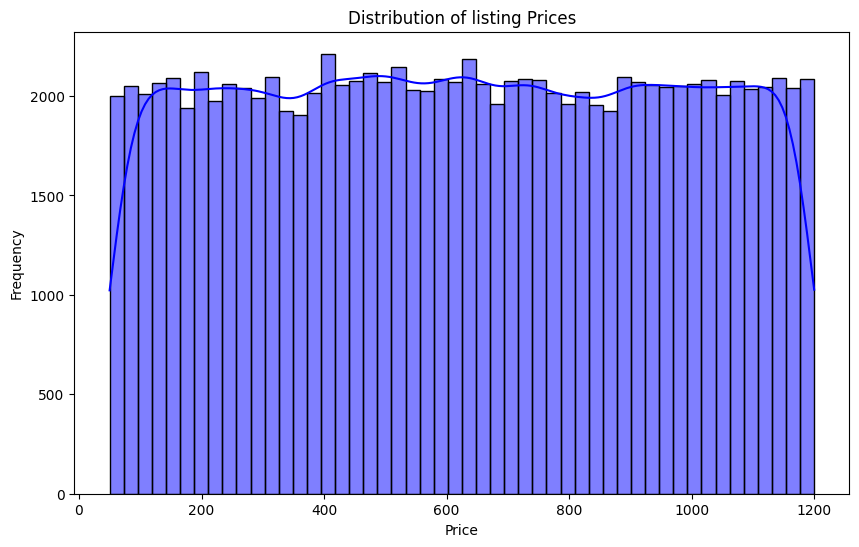

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='price',bins=50,kde=True,color='blue')
plt.title('Distribution of listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram shows a fairly even distribution of
listing prices across different price ranges, indicating no
particular concentration of listings in any specific price range.
The KDE line helps visualize this even spread more clearly,
confirming that the dataset contains listings with a wide variety of prices

### Room Type Analysis

C:\Users\nkssd\AppData\Local\Temp\ipykernel_2636\433915509.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room type',data=df,palette='Set2')


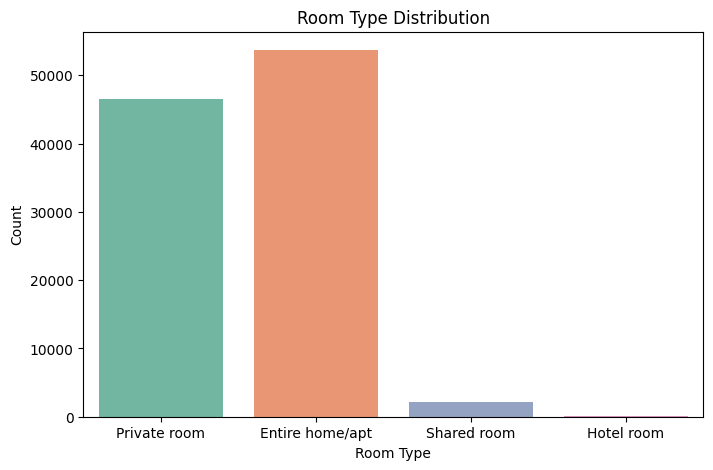

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x='room type',data=df,palette='Set2')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

As it can be seen from the countplot, most of the listings are Entire home/apt with private rooms being second and shared rooms being the third and hotel room are the least.

#### Neighborhood Analysis
Examine how listings are distributed across different neighborhoods.

Text(0.5, 1.0, 'Number of Listings by Neighborhood Group')

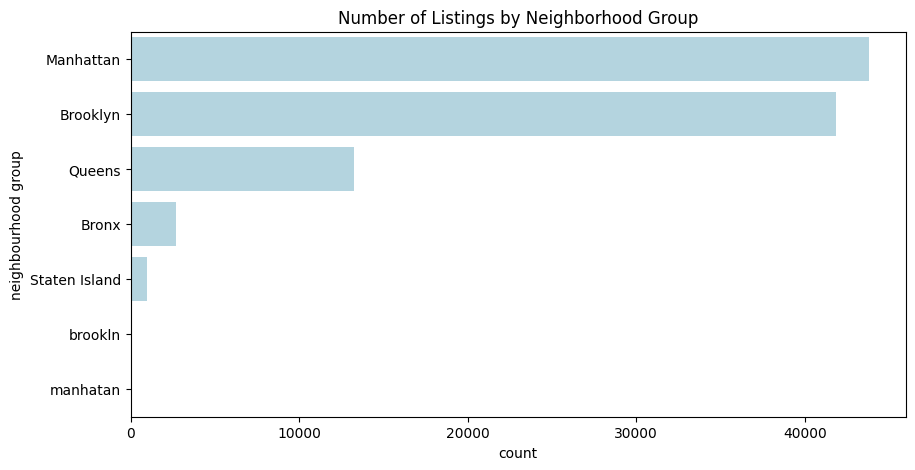

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,y='neighbourhood group',color='lightblue',order=df['neighbourhood group'].value_counts().index)
plt.title('Number of Listings by Neighborhood Group')


The count plot shows  Manhattan and Brooklyn dominate the listings,
suggesting they are prime locations for Airbnb. Queens,
Bronx, and Staten Island have fewer listings,
indicating less availability or popularity

### Price vs. Room Type
Visualize the relationship between price and room type

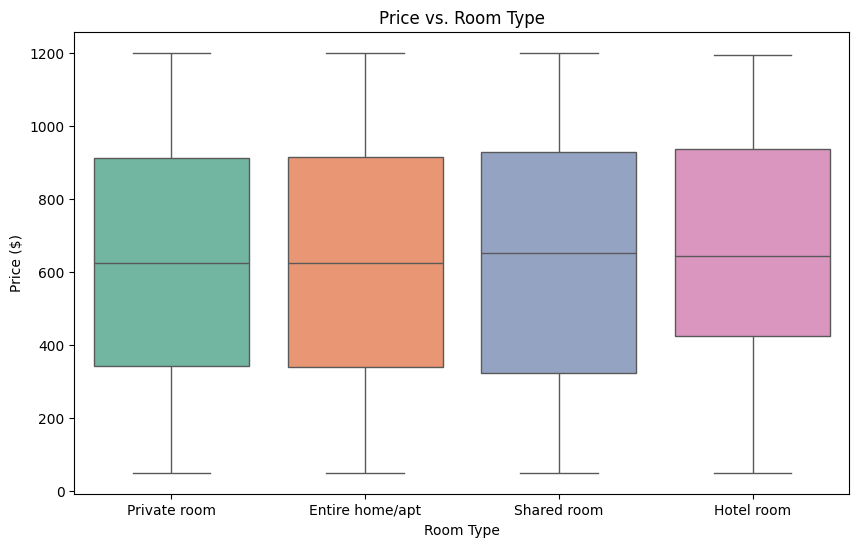

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='room type',y='price',hue='room type',palette='Set2')
plt.title('Price vs. Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()


The box plot provides a detailed view
of how prices vary across different room types
in the Airbnb dataset. It shows that while
'Shared room' tends to have lower prices, 'Private room',
'Entire home/apt', and 'Hotel room' have higher and more varied price ranges.
This visualization helps in understanding the pricing
dynamics for different types of accommodations on Airbnb.

### Reviews Over Time

In [36]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0


### Reviews Over Time

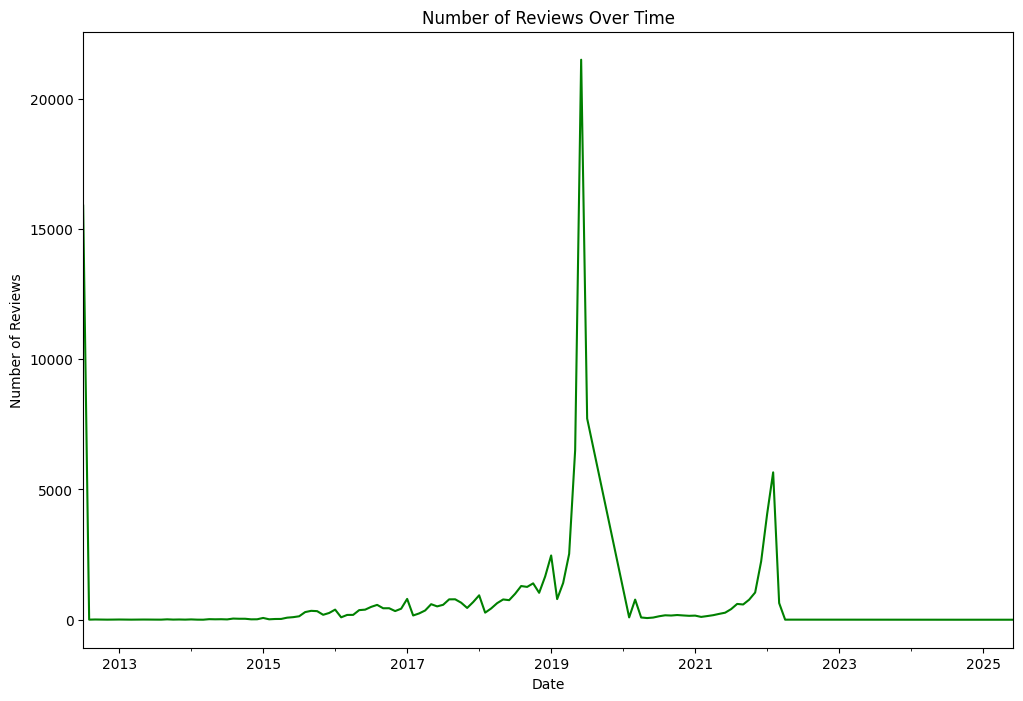

In [44]:
reviews_over_time=df[df['last review']<='2025-12'].groupby(df['last review'].dt.to_period('M')).size()
plt.figure(figsize=(12,8))
reviews_over_time.plot(kind='line',color='green')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


The line plot provides a clear visualization
of the number of reviews over time.
It helps identify trends and patterns in review activity,
such as periods of high or low activity.
This information can be useful for understanding
 the dynamics of user engagement and the popularity
of Airbnb listings over time. The significant spikes
and drops in reviews might be worth further investigation
 to understand the underlying causes, such as changes
 in Airbnb policies, market conditions, or external events.
